In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
import matplotlib.pylab as plt
%matplotlib inline

/usr/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
train = pd.read_csv("./train.csv")
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
train.count() # 15,120

In [3]:
target = 'Cover_Type'
IDcol = 'Id'

In [63]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=cv_folds,
                                                   # scoring='roc_auc',
                                                    n_jobs=8
                                                   )
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    #print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))  
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.8337
CV Score : Mean - 0.7226852 | Std - 0.03954595 | Min - 0.6729497 | Max - 0.7850529


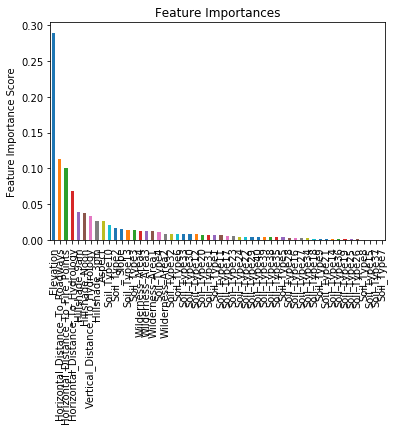

In [17]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors)

In [ ]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
param_test1 = {'n_estimators':np.arange(730,830,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.10, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10),
                        param_grid = param_test1, scoring='accuracy',n_jobs=8,iid=False, cv=5,verbose=2)
gsearch1.fit(train[predictors],train[target])

In [ ]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [40]:
param_test2 = {'max_depth':np.arange(15,28,2), 'min_samples_split':np.arange(50,101,25)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=790, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='accuracy',n_jobs=8,iid=False, cv=5, verbose=2)
gsearch2.fit(train[predictors],train[target])

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] max_depth=15, min_samples_split=50 ..............................
[CV] max_depth=15, min_samples_split=50 ..............................
[CV] max_depth=15, min_samples_split=50 ..............................
[CV] max_depth=15, min_samples_split=50 ..............................
[CV] max_depth=15, min_samples_split=50 ..............................
[CV] max_depth=15, min_samples_split=75 ..............................
[CV] max_depth=15, min_samples_split=75 ..............................
[CV] max_depth=15, min_samples_split=75 ..............................
[CV] ..................... max_depth=15, min_samples_split=50 - 2.0min
[CV] max_depth=15, min_samples_split=75 ..............................
[CV] ..................... max_depth=15, min_samples_split=50 - 2.0min
[CV] max_depth=15, min_samples_split=75 ..............................
[CV] ..................... max_depth=15, min_samples_split=50 - 2.0min
[CV] max_depth=

[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  8.3min


[CV] .................... max_depth=17, min_samples_split=100 - 2.2min
[CV] max_depth=19, min_samples_split=50 ..............................
[CV] .................... max_depth=17, min_samples_split=100 - 2.2min
[CV] max_depth=19, min_samples_split=50 ..............................
[CV] ..................... max_depth=19, min_samples_split=50 - 2.1min
[CV] max_depth=19, min_samples_split=75 ..............................
[CV] .................... max_depth=17, min_samples_split=100 - 2.2min
[CV] max_depth=19, min_samples_split=75 ..............................
[CV] ..................... max_depth=19, min_samples_split=50 - 2.1min
[CV] max_depth=19, min_samples_split=75 ..............................
[CV] .................... max_depth=17, min_samples_split=100 - 2.2min
[CV] max_depth=19, min_samples_split=75 ..............................
[CV] .................... max_depth=17, min_samples_split=100 - 2.3min
[CV] max_depth=19, min_samples_split=75 ..............................
[CV] .

[CV] ..................... max_depth=25, min_samples_split=75 - 2.1min
[CV] max_depth=27, min_samples_split=50 ..............................
[CV] ..................... max_depth=25, min_samples_split=75 - 2.1min
[CV] max_depth=27, min_samples_split=50 ..............................
[CV] .................... max_depth=25, min_samples_split=100 - 2.1min
[CV] max_depth=27, min_samples_split=50 ..............................
[CV] .................... max_depth=25, min_samples_split=100 - 2.2min
[CV] max_depth=27, min_samples_split=50 ..............................
[CV] .................... max_depth=25, min_samples_split=100 - 2.1min
[CV] max_depth=27, min_samples_split=75 ..............................
[CV] .................... max_depth=25, min_samples_split=100 - 2.1min
[CV] max_depth=27, min_samples_split=75 ..............................
[CV] ..................... max_depth=27, min_samples_split=50 - 2.0min
[CV] max_depth=27, min_samples_split=75 ..............................
[CV] .

[Parallel(n_jobs=8)]: Done 105 out of 105 | elapsed: 28.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=790,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=8,
       param_grid={'max_depth': array([15, 17, 19, 21, 23, 25, 27]), 'min_samples_split': array([ 50,  75, 100])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=2)

In [41]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.78466, std: 0.03509, params: {'max_depth': 15, 'min_samples_split': 50},
  mean: 0.78631, std: 0.03531, params: {'max_depth': 15, 'min_samples_split': 75},
  mean: 0.78611, std: 0.03766, params: {'max_depth': 15, 'min_samples_split': 100},
  mean: 0.78704, std: 0.03696, params: {'max_depth': 17, 'min_samples_split': 50},
  mean: 0.78790, std: 0.03678, params: {'max_depth': 17, 'min_samples_split': 75},
  mean: 0.78479, std: 0.03524, params: {'max_depth': 17, 'min_samples_split': 100},
  mean: 0.78664, std: 0.03745, params: {'max_depth': 19, 'min_samples_split': 50},
  mean: 0.78690, std: 0.03585, params: {'max_depth': 19, 'min_samples_split': 75},
  mean: 0.78598, std: 0.03501, params: {'max_depth': 19, 'min_samples_split': 100},
  mean: 0.78730, std: 0.03729, params: {'max_depth': 21, 'min_samples_split': 50},
  mean: 0.78565, std: 0.03923, params: {'max_depth': 21, 'min_samples_split': 75},
  mean: 0.78743, std: 0.03537, params: {'max_depth': 21, 'min_samples_split': 100},


In [ ]:
param_test3 = {'min_samples_split':np.arange(50,101,25), 'min_samples_leaf':np.arange(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=790,max_depth=17,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='accuracy',n_jobs=8,iid=False, cv=5, verbose=2)
gsearch3.fit(train[predictors],train[target])

In [ ]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_


Model Report
Accuracy : 1
CV Score : Mean - 0.7871693 | Std - 0.03684616 | Min - 0.7490079 | Max - 0.8535053


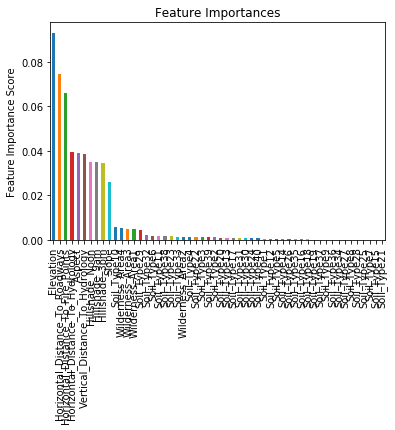

In [48]:
modelfit(gsearch3.best_estimator_, train, predictors)

In [55]:
param_test4 = {'max_features':np.arange(19,32,2)} # Need to try 25+
gsearch4 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1, n_estimators=790,max_depth=17,max_features='sqrt', subsample=0.8, random_state=10, min_samples_leaf=30), 
                                                 param_grid = param_test4, scoring='accuracy',n_jobs=8,iid=False, cv=5, verbose=2)
gsearch4.fit(train[predictors],train[target])

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] max_features=19 .................................................
[CV] max_features=19 .................................................
[CV] max_features=19 .................................................
[CV] max_features=19 .................................................
[CV] max_features=19 .................................................
[CV] max_features=21 .................................................
[CV] max_features=21 .................................................
[CV] max_features=21 .................................................
[CV] ........................................ max_features=19 - 3.3min
[CV] max_features=21 .................................................
[CV] ........................................ max_features=19 - 3.3min
[CV] max_features=21 .................................................
[CV] ........................................ max_features=19 - 3.3min
[CV] max_features

[Parallel(n_jobs=8)]: Done  35 out of  35 | elapsed: 17.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=17,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=790,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=8,
       param_grid={'max_features': array([19, 21, 23, 25, 27, 29, 31])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=2)

In [56]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.79372, std: 0.03549, params: {'max_features': 19},
  mean: 0.79200, std: 0.03636, params: {'max_features': 21},
  mean: 0.79167, std: 0.03401, params: {'max_features': 23},
  mean: 0.79702, std: 0.03374, params: {'max_features': 25},
  mean: 0.79524, std: 0.03486, params: {'max_features': 27},
  mean: 0.79537, std: 0.03399, params: {'max_features': 29},
  mean: 0.79431, std: 0.03496, params: {'max_features': 31}],
 {'max_features': 25},
 0.7970238095238095)

In [59]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=790,max_depth=17,max_features=25, subsample=0.8, random_state=10, min_samples_leaf=30), 
                        param_grid = param_test5, scoring='accuracy',n_jobs=8,iid=False, cv=5, verbose=2)
gsearch5.fit(train[predictors],train[target])

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] subsample=0.6 ...................................................
[CV] subsample=0.6 ...................................................
[CV] subsample=0.6 ...................................................
[CV] subsample=0.6 ...................................................
[CV] subsample=0.6 ...................................................
[CV] subsample=0.7 ...................................................
[CV] subsample=0.7 ...................................................
[CV] subsample=0.7 ...................................................
[CV] .......................................... subsample=0.7 - 4.1min
[CV] subsample=0.7 ...................................................
[CV] .......................................... subsample=0.7 - 4.1min
[CV] subsample=0.7 ...................................................
[CV] .......................................... subsample=0.7 - 4.1min
[CV] subsample=0.

[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed: 15.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=17,
              max_features=25, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=790,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=8,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=2)

In [60]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.79134, std: 0.03651, params: {'subsample': 0.6},
  mean: 0.79464, std: 0.03360, params: {'subsample': 0.7},
  mean: 0.79597, std: 0.03546, params: {'subsample': 0.75},
  mean: 0.79702, std: 0.03374, params: {'subsample': 0.8},
  mean: 0.79643, std: 0.03233, params: {'subsample': 0.85},
  mean: 0.79411, std: 0.03534, params: {'subsample': 0.9}],
 {'subsample': 0.8},
 0.7970238095238095)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1       23075.2596         106.5031           11.91m
         2       22639.2231         103.9030           12.12m
         3       22216.1865          99.4959           12.50m
         4       21811.0117          96.9147           12.75m
         5       21424.3360          88.9055           12.81m
         6       21051.8413          85.9820           12.89m
         7       20699.0586          84.6101           12.94m
         8       20354.0573          81.9233           12.88m
         9       20016.2930          78.1236           12.89m
        10       19693.5082          76.7915           12.84m
        20       16948.4857          55.6525           13.05m
        30       14840.6680          42.9147           13.35m
        40       13145.1380          35.1758           13.41m
        50       11747.1384          28.0715           13.47m
        60       10617.4506          23.9952           13.43m
       

       200        3171.5714           2.3150           17.10m
       300        1874.1686           0.6896           13.57m
       300        1958.8336           0.6603           13.96m
       300        1856.4765           0.5755           14.09m
       300        1850.8240           0.6626           14.53m
       300        1963.4286           0.7647           15.58m
       400        1242.7500           0.0718           12.38m
       400        1316.2702           0.0949           12.68m
       400        1249.9004           0.0351           13.15m
       400        1245.0566           0.2390           13.25m
       400        1317.3652           0.1780           13.97m
       500         855.5250          -0.0593           11.59m
       500         856.2567          -0.0016           11.73m
       500         859.8588          -0.0447           11.84m
       500         927.4479          -0.0932           12.24m
       500         910.0344          -0.0275           13.02m
       6

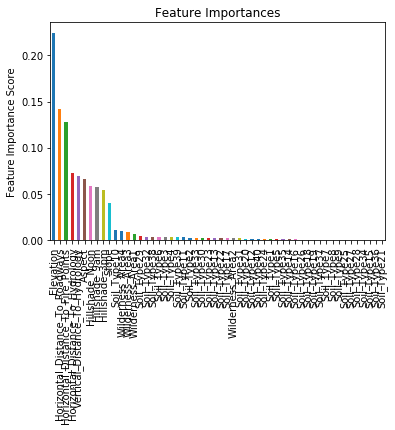

In [64]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1600,max_depth=17,max_features=25, subsample=0.8, random_state=10, min_samples_leaf=30,verbose=1)
modelfit(gbm_tuned_1, train, predictors)